In [16]:
import pandas as pd
import string
import warnings
import nltk
import sklearn
import matplotlib.pyplot as plt
import numpy as np
from nltk import stem
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

i = 0
warnings.simplefilter(action='ignore', category=FutureWarning)
data = pd.read_csv("SmsCollection.csv", encoding = "UTF-8", delimiter= ';', error_bad_lines= False, warn_bad_lines=False)
stemmer = stem.SnowballStemmer('english')
stopwords = set(stopwords.words('english'))

#data processing
for sentence in data['text']:
    #remove punctuation
    sentence = sentence.translate(str.maketrans('', '', string.punctuation))
    #remove stopwords & convert to lower case
    sentence = [word.lower() for word in sentence.split() if word not in stopwords]  
    #stemming
    sentence = " ".join([stemmer.stem(word) for word in sentence])
    #write back to the dataframe
    data['text'][i] = sentence
    i +=1

X = data['text']
y = data['label']

# training vectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

#cross validation
clf = svm.SVC(kernel='linear', C=1)
n_samples = X.shape[0]
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
score = cross_val_score(clf, X, y, cv=cv)

#result
print(score)
print(np.average(score))
print(np.std(score))

[0.97961783 0.98089172 0.96878981 0.97898089 0.97452229 0.97643312
 0.97834395 0.97898089 0.97707006 0.98152866]
0.977515923566879
0.0035124371156591678


<Figure size 432x288 with 0 Axes>

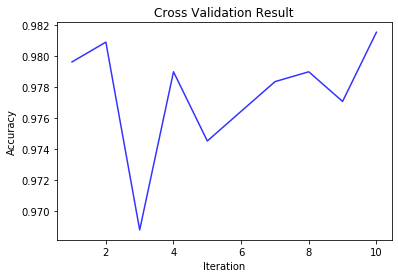

Overall accuracy: 0.98 (+/- 0.01)


In [15]:
fig = plt.figure()
y = score
numBins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.figure()
plt.plot(numBins, y, color='blue',alpha=0.8)
plt.title('Cross Validation Result')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.show()
print("Overall accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))